### TWEET CLASSIFICATION

#### Description

Objective of the competition is to ,built a model that classify weather a tweet is really about a disaster or not.

#### Data Overview

- Train.csv contains 5 columns : id,keyword,location,text,target.
- Size of train.csv - 965 KB.
- Number of rows in train.csv = 7613

- .csv contains 4 columns : id,keyword,location,text.
- Size of test.csv - 411 KB.
- Number of rows in Train.csv = 3263

#### Mapping the real world problem to an ML Problem

##### Type of Machine Learning Problem

It is a binary classification problem, for a given tweet we need to predict if the tweet is really about a disaster or not

##### Performance Metric

- The cost of a mis-classification can be  high.
- Need to classify/predict for both the positive and negative class correctly.
- F1 Score is taken as the performance metric for the competition

### Machine Learning Problem

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/sample_submission.csv


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_df=pd.read_csv(r'/kaggle/input/nlp-getting-started/train.csv')
data_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


#### Basic EDA

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
data_df.shape

(7613, 5)

In [6]:
data_df.drop_duplicates(keep=False,inplace=True)
data_df.shape

(7613, 5)

In [7]:
data_df['target'].value_counts(normalize=True)

0    0.57034
1    0.42966
Name: target, dtype: float64

- Features Keyword and location are having null values.
- There are no duplicate rows found.

##### Distribution of datapoint among output

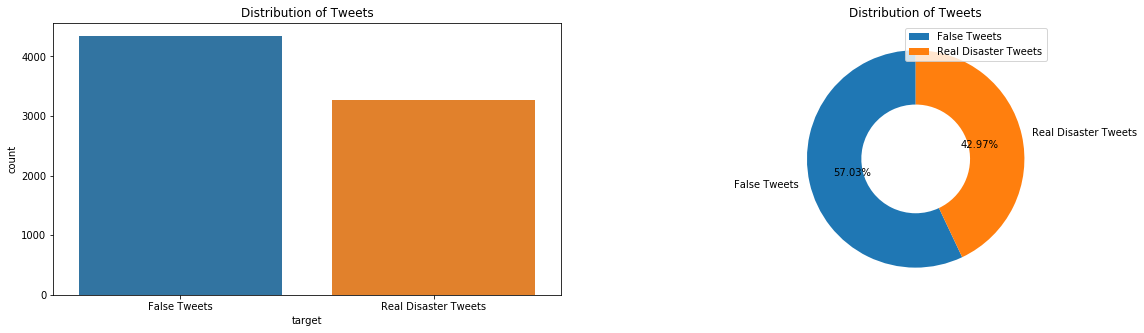

In [8]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='target',data=data_df)
plt.xticks(np.arange(2), ('False Tweets','Real Disaster Tweets'))
plt.title('Distribution of Tweets')

plt.subplot(1,2,2)
sizes=[x for x in data_df['target'].value_counts()]
status='False Tweets','Real Disaster Tweets'
plt.pie(sizes,labels=status,wedgeprops=dict(width=0.5),startangle=90,autopct='%1.2f%%')
plt.legend()
plt.title('Distribution of Tweets')
plt.show()

- 57% tweets are not actually indicating disaster.
- 43% tweets are indicating disaster.
- There is not huge differrence between positive and negative class.Hence,no need to apply upsampling.

##### ID vs Tweets

In [9]:
unq_ids=data_df['id'].nunique()
print(f"number of unique ids:{unq_ids}")

number of unique ids:7613


##### Keywords vs Tweets

In [10]:
def grpcount(ftr):
    temp=pd.DataFrame(data_df.groupby(ftr)['target'].agg(lambda x: x.eq(1).sum())).reset_index()
    temp['total']=pd.DataFrame(data_df.groupby(ftr)['target'].agg({'total':'count'})).reset_index()['total']
    temp['Avg']=pd.DataFrame(data_df.groupby(ftr)['target'].agg({'Avg':'mean'})).reset_index()['Avg']
    temp.rename(columns={'target':'disaster_tweets'},inplace=True)
    temp.sort_values(by=['Avg'],inplace=True, ascending=False)
    return temp

In [11]:
def plotftr(df,ftr,avg_ul,avg_lwl,min_occrnc,title):
    Imp_ftrs=df.loc[(df['Avg']>avg_ul)&(df['total']>min_occrnc),[ftr,'Avg']][0:20]
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.barplot(x=Imp_ftrs[ftr],y=temp_df['Avg'],data=temp_df)
    plt.xticks(rotation=90)
    #reference->https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
    plt.rc('xtick',labelsize=12)
    plt.rc('axes', labelsize=15)
    plt.rc('axes', titlesize=15)
    plt.title(title+' with highest% of real disaster tweets')
    
    Imp_ftrs=df.loc[(df['Avg']<avg_lwl),[ftr,'Avg']][-20:]
    plt.subplot(1,2,2)
    sns.barplot(x=Imp_ftrs[ftr],y=temp_df['Avg'],data=temp_df)
    plt.xticks(rotation=90)
    plt.rc('xtick',labelsize=12)
    plt.rc('axes', labelsize=15)
    plt.rc('axes', titlesize=15)
    plt.title(title+' with lowest% of real disaster tweets')
    plt.show()

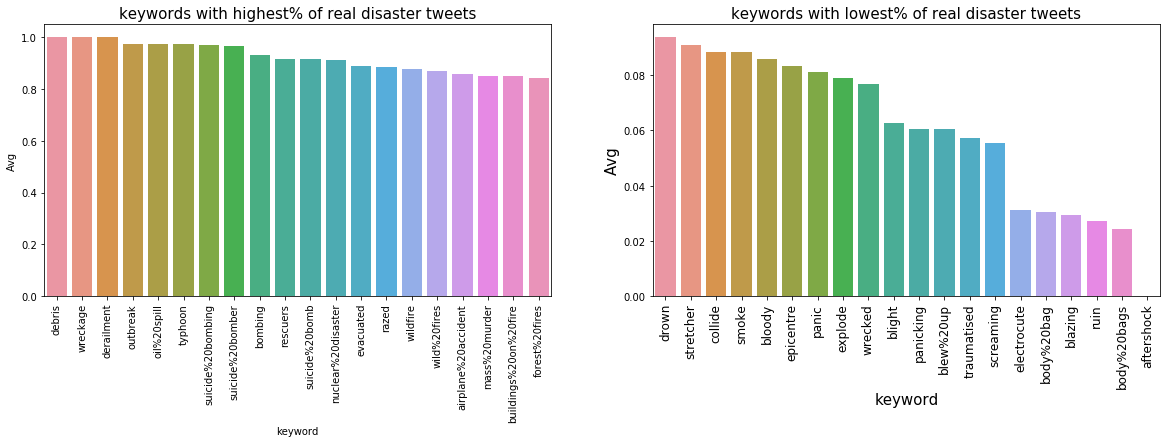

In [12]:
temp_df=grpcount('keyword')
plotftr(temp_df,'keyword',0.7,0.4,5,'keywords')

- 90%  of the tweets that indicates disastermbelongs to keywords words such as debris,wreckage,derailment,outbreak,oilspill,typhoon,bombing etc..
- Only 20% of tweets with keywords  aftershock,ruin,electrocute etc. indicate  disaster. 

##### Location vs Tweets

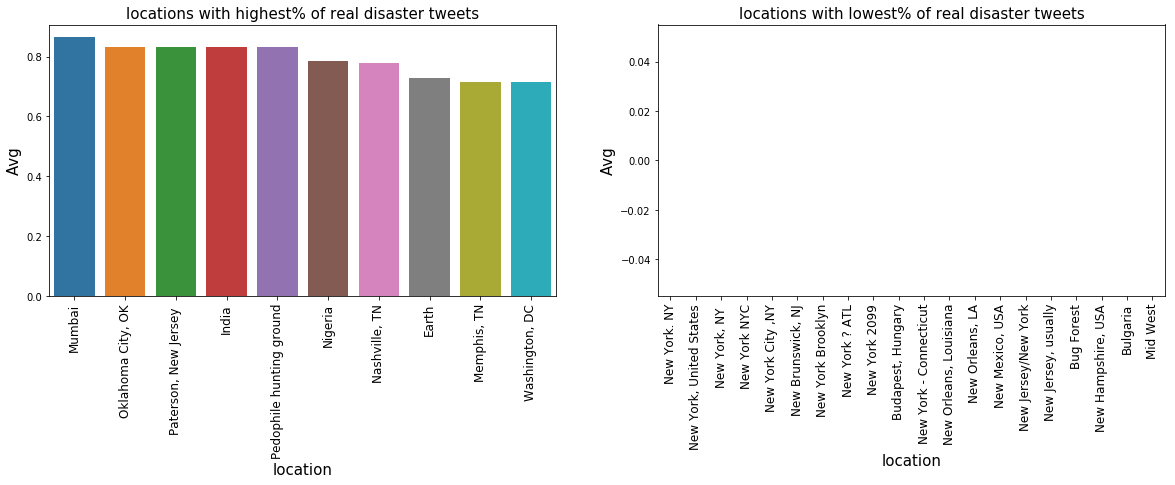

In [13]:
temp_df=grpcount('location')
plotftr(temp_df,'location',0.7,0.4,5,'locations')

- Among the tweets reported from mumbai/India as disaster, 90% of them are actuall disaster.
- The locations are not automatically generated.They are entered by the user.They may not be much helpful in classification.

##### Null-Value Treatment

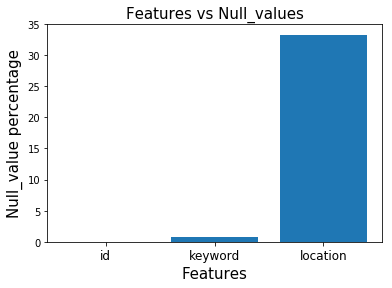

In [14]:
lst=data_df.columns[0:3]
null_key=[]
null_percnt=[]
for i in lst: 
    null_percnt.append((data_df[i].isna().sum()/data_df.shape[0])*100)
    null_key.append(i)
null_dct=dict((key,val) for key,val in zip(null_key,null_percnt))
null_dct_sorted=dict(sorted(null_dct.items(),key=lambda kv:kv[1]))
plt.bar(null_dct_sorted.keys(),null_dct_sorted.values())
plt.xlabel('Features')
plt.ylabel('Null_value percentage')
plt.title('Features vs Null_values')
plt.show()

In [15]:
data_df['keyword']=data_df['keyword'].fillna(data_df['keyword'].mode()[0])
data_df['location']=data_df['location'].fillna(data_df['location'].mode()[0])

In [16]:
data_df.isna().sum().max()

0

- Null values in both features,keyword and location are below 35%.Retained both the columns and performed imputation with modes of respective columns.

##### Peeking into data- Location & Keyword

###### Location

In [17]:
data_df['location'][200:230]

200     VISIT MY YOUTUBE CHANNEL.
201                     Lexington
202                           USA
203                           USA
204             Hannover, Germany
205                           USA
206                           USA
207                         Playa
208                  Davidson, NC
209                 Higher Places
210                 Horsemind, MI
211                  New York, NY
212                      Boksburg
213                           USA
214                           USA
215                           USA
216    V-RP @OZRP_ ?MV, AU, R18+?
217        Greater Manchester, UK
218                        Boston
219                           USA
220                           USA
221            The Canopy Kingdom
222                           USA
223                           USA
224                           USA
225                           USA
226           the own zone layer 
227                        London
228                  Trancy Manor
229           

- Locations are not system generated.They are entered by the user themseleves.It is better to avoid location as a feature.

In [18]:
data_df.drop(['location'],axis=1,inplace=True)

###### Keyword

In [19]:
data_df['keyword'].value_counts()[:20]

fatalities     106
deluge          42
armageddon      42
sinking         41
harm            41
damage          41
body%20bags     41
collided        40
siren           40
evacuate        40
outbreak        40
twister         40
fear            40
windstorm       40
weapon          39
famine          39
earthquake      39
sinkhole        39
flames          39
wrecked         39
Name: keyword, dtype: int64

- Keyword can be used as a feature.

#### Text Preprocessing

In [20]:
#reference-->https://towardsdatascience.com/nlp-text-preprocessing-a-practical-guide-and-template-d80874676e79
#https://medium.com/@jorlugaqui/how-to-strip-html-tags-from-a-string-in-python-7cb81a2bbf44

##### Remove URLs&HTML tags

In [21]:
import re
def htmlremover(data,ftr):
    clean=[]
    for sentance in data[ftr].values:
        #remove html tags
        pattern=re.compile(r'<.*?>')
        sentance=re.sub(pattern,'',sentance)
        #remove urls
        pattern1=re.compile(r'http\S+')
        clean.append(re.sub(pattern1,'',sentance))
    return clean        

In [22]:
##eg:
tmp=['<br />http://www.amazon.com/VICTOR-FLY-MAGNET-BAIT-REFILL/dp/B00004RBDY<br /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.']
tmp_df=pd.DataFrame()
tmp_df['txt']=tmp
tmp_df

,txt
0,<br />http://www.amazon.com/VICTOR-FLY-MAGNET-...


In [23]:
cleaned_tmp=htmlremover(tmp_df,'txt')
tmp_df['txt']=cleaned_tmp
tmp_df

,txt
0,"Victor M380 and M502 traps are unreal, of cou..."


##### Remove accented characters

In [24]:
import unicodedata
def remove_accented_chars(data,ftr):
    clean=[]
    for sentance in data[ftr].values:
        clean_sent = unicodedata.normalize('NFKD', sentance).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        clean.append(clean_sent)
    return clean      

In [25]:
##eg:
tmp=['Sómě Áccěntěd těxt this is a paragraph.']
tmp_df=pd.DataFrame()
tmp_df['txt']=tmp

In [26]:
clean=remove_accented_chars(tmp_df,'txt')

In [27]:
clean

['Some Accented text this is a paragraph.']

##### Remove Emojis

In [28]:
#ref:https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
def emojiremover(data,ftr):
    clean=[]
    for sentance in data[ftr].values:
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
        clean.append(re.sub(emoji_pattern,'',sentance))
    return clean

In [29]:
##eg:
tmp=['Life is 💕 beautiful.Be 👭 happy']
tmp_df=pd.DataFrame()
tmp_df['txt']=tmp
tmp_df

,txt
0,Life is 💕 beautiful.Be 👭 happy


In [30]:
clean=remove_accented_chars(tmp_df,'txt')
clean

['Life is  beautiful.Be  happy']

##### Decontracting words

In [31]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(data,ftr):
    clean=[]
    for sentance in data[ftr].values:
        # specific
        sentance = re.sub(r"won't", "will not", sentance)
        sentance = re.sub(r"can\'t", "can not", sentance)

        # general
        sentance = re.sub(r"n\'t", " not",sentance)
        sentance = re.sub(r"\'re", " are",sentance)
        sentance = re.sub(r"\'s", " is", sentance)
        sentance = re.sub(r"\'d", " would",sentance)
        sentance = re.sub(r"\'ll", " will",sentance)
        sentance = re.sub(r"\'t", " not",sentance)
        sentance = re.sub(r"\'ve", " have",sentance)
        sentance = re.sub(r"\'m", " am",sentance)
        clean.append(sentance)
    return clean

In [32]:
##eg:
tmp=["We \'re strong.we \'ll win"]
tmp_df=pd.DataFrame()
tmp_df['txt']=tmp
tmp_df

,txt
0,We 're strong.we 'll win


In [33]:
clean=decontracted(tmp_df,'txt')
clean

['We  are strong.we  will win']

##### Remove Special Characters

In [34]:
def remove_special_characters(data,ftr):
    clean=[]
    for sentance in data[ftr].values:
        pattern = r'[^a-zA-z0-9\s]'
        clean.append(re.sub(pattern, '',sentance))
    return clean

#remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          #remove_digits=True)

##### Convert to Lowercase

In [35]:
def lowercase(data,ftr):
    data[ftr]=data[ftr].map(lambda x:x.lower())
    return data

##### Remove whitespaces and newlines

In [36]:
def whitespace_remover(data,ftr):
    clean=[]
    for sent in data[ftr].values:
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        clean.append(sent)
    return clean

##### Lemmatization

In [37]:
#import nltk
#nltk.download('wordnet')

In [38]:
"""from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def lemmatize(data,ftr):
    clean=[]
    for para in data[ftr].values:
        clean_sent=[]
        sent_lst=[sentance for sentance in para.split('.')]
        for sentance in sent_lst :
            wrd_lst=nltk.word_tokenize(sentance)
            sent=' '.join(lemmatizer.lemmatize(word) for word in wrd_lst)
            clean_sent.append(sent.strip())
        para1='.'.join(sentance.strip() for sentance in clean_sent)
        clean.append(para1)
    return clean"""   

"from nltk.tokenize import word_tokenize \nfrom nltk.stem import WordNetLemmatizer\nlemmatizer=WordNetLemmatizer()\ndef lemmatize(data,ftr):\n    clean=[]\n    for para in data[ftr].values:\n        clean_sent=[]\n        sent_lst=[sentance for sentance in para.split('.')]\n        for sentance in sent_lst :\n            wrd_lst=nltk.word_tokenize(sentance)\n            sent=' '.join(lemmatizer.lemmatize(word) for word in wrd_lst)\n            clean_sent.append(sent.strip())\n        para1='.'.join(sentance.strip() for sentance in clean_sent)\n        clean.append(para1)\n    return clean"

In [39]:
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def lemmatize(data,ftr):
    clean=[]
    for sentance in data[ftr].values:
        wrd_lst=word_tokenize(sentance)
        sent=' '.join(lemmatizer.lemmatize(word) for word in wrd_lst)
        clean.append(sent)
    return clean

In [40]:
##eg:
tmp=["rocks fall on his feet"]
tmp_df=pd.DataFrame()
tmp_df['txt']=tmp
tmp_df

,txt
0,rocks fall on his feet


In [41]:
cln=lemmatize(tmp_df,'txt')
tmp_df['txt']=cln
tmp_df

,txt
0,rock fall on his foot


##### Stemming

##### Remove StopWords

In [42]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [43]:
def stopword_removing(data,ftr):
    clean=[]
    for sentance in data[ftr].values:
        wrd_lst=word_tokenize(sentance)
        sent=' '.join(word for word in wrd_lst if word not in stopwords)
        clean.append(sent.strip())
    return clean

In [44]:
##eg:
tmp=["this pasta is very tasty"]
tmp_df=pd.DataFrame()
tmp_df['txt']=tmp
tmp_df

,txt
0,this pasta is very tasty


In [45]:
cln=stopword_removing(tmp_df,'txt')
tmp_df['txt']=cln
tmp_df

,txt
0,pasta tasty


##### Normalizing Text

In [46]:
def text_normalizing(data,ftr):
    #removing urls and html tags
    cleaned_column=htmlremover(data,ftr)
    data[ftr]=cleaned_column

    #removing accented characters
    cleaned_column=remove_accented_chars(data,ftr)
    data[ftr]=cleaned_column

    #removing emojis
    cleaned_column=emojiremover(data,ftr)
    data[ftr]=cleaned_column

    #decontracting words
    cleaned_column=decontracted(data,ftr)
    data[ftr]=cleaned_column

    #remove special characters
    cleaned_column=remove_special_characters(data,ftr)
    data[ftr]=cleaned_column

    #convert to lowercase
    data=lowercase(data,ftr)

    #white-space remover
    cleaned_column=whitespace_remover(data,ftr)
    data[ftr]=cleaned_column

    #lemmatization
    cleaned_column=lemmatize(data,ftr)
    data[ftr]=cleaned_column

    #stemming
    #cleaned_column=stemming(data_df,'text')
    #data_df['text']=cleaned_column

    #removing stopwords
    cleaned_column=stopword_removing(data,ftr)
    data[ftr]=cleaned_column
    
    return data


In [47]:
data_df=text_normalizing(data_df,'text')
data_df.head()

,id,keyword,text,target
0,1,fatalities,deed reason earthquake may allah forgive u,1
1,4,fatalities,forest fire near la ronge sask canada,1
2,5,fatalities,resident asked ishelter place notified officer...,1
3,6,fatalities,13000 people receive wildfire evacuation order...,1
4,7,fatalities,got sent photo ruby alaska smoke wildfire pour...,1


In [48]:
data_df.drop(['id'],axis=1,inplace=True)
data_df.head(2)

,keyword,text,target
0,fatalities,deed reason earthquake may allah forgive u,1
1,fatalities,forest fire near la ronge sask canada,1


In [49]:
print(f"Shape of data matrix after text_normalization is : {data_df.shape}")

Shape of data matrix after text_normalization is : (7613, 3)


- As the feature id is not uch hepful in classification,droped the feature fro data.

#### Train-Test split

In [50]:
base_data=data_df
Y=data_df['target']
data_df.drop(['target'],axis=1,inplace=True)
X=data_df

In [51]:
X.head(2)

,keyword,text
0,fatalities,deed reason earthquake may allah forgive u
1,fatalities,forest fire near la ronge sask canada


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,stratify=Y)

- Split the data into X_train for training the model and X_test for validating the model.
- Split the target into Y_train and Y_test.

In [53]:
print(f"Shape of train data:{X_train.shape}")
print(f"Shape of test data:{X_test.shape}")

Shape of train data:(5100, 2)
Shape of test data:(2513, 2)


#### Word Vectorization

##### Tf-idf vectorization

In [54]:
"""Encoding tweets-text"""
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2),min_df=10)
vectorizer.fit(X_train['text'].values) 
train_text_tf=vectorizer.transform(X_train['text'].values)
test_text_tf=vectorizer.transform(X_test['text'].values)

In [55]:
print("Data after vectorization")
print(f"Train data-:{train_text_tf.shape},Train data-target-:{Y_train.shape}")
print(f"Test data-:{test_text_tf.shape},Test data-target-:{Y_test.shape}")

Data after vectorization
Train data-:(5100, 200),Train data-target-:(5100,)
Test data-:(2513, 200),Test data-target-:(2513,)


#### Encoding

##### One-Hot Encoding

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
def wordvectorizer(train,test):
    vectorizer=CountVectorizer(lowercase=False,binary=True)
    vectorizer.fit(train.values)
    one_hot_train=vectorizer.transform(train.values)
    one_hot_test=vectorizer.transform(test.values)
    return one_hot_train,one_hot_test

In [57]:
"""Vectorizing Keyword -One hot encoding"""
keyword_one_hot_X_train,keyword_one_hot_X_test=\
wordvectorizer(X_train['keyword'],X_test['keyword'])
print("Data after vectorizations")
print(keyword_one_hot_X_train.shape,Y_train.shape)
print(keyword_one_hot_X_test.shape,Y_test.shape)

Data after vectorizations
(5100, 239) (5100,)
(2513, 239) (2513,)


##### Stacking sparse matrices

In [58]:
from scipy.sparse import hstack
X_tr=hstack((train_text_tf,keyword_one_hot_X_train)).tocsr()
X_te=hstack((test_text_tf,keyword_one_hot_X_test)).tocsr()
print("Data after stacking")
print(f"Train data-:{X_tr.shape},Train data-Target:{Y_train.shape}")
print(f"Test data- X_data:{X_te.shape},Test data-Target:{Y_test.shape}")

Data after stacking
Train data-:(5100, 439),Train data-Target:(5100,)
Test data- X_data:(2513, 439),Test data-Target:(2513,)


#### Model:Logistic Regression +One hot Encoding of Categorical class data

In [59]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
import warnings
warnings.filterwarnings("ignore")

In [60]:
h_para=[0.001,0.01,0.1,1,10,100]

In [61]:
def tuning(dataX,dataY,mdl):
    train_auc=[]
    cv_auc=[]
    if mdl==0:
        para={'C':[0.001,0.01,0.1,1,10,100],'max_iter':[10]}
        lr=LogisticRegression()
        lr_model=GridSearchCV(lr,para,scoring='roc_auc',return_train_score=True)
        lr_model.fit(dataX,dataY)

        train_auc= lr_model.cv_results_['mean_train_score']
        cv_auc= lr_model.cv_results_['mean_test_score']
        return train_auc,cv_auc,lr_model
    else:
        if mdl==1:
            para={'max_depth':[2,3,4,5,6,8,10],'n_estimators':[50,100,200,300,1000]}
            lr=XGBClassifier(criterion='gini',class_weight='balanced')
            lr_model=GridSearchCV(lr,para,scoring='roc_auc',return_train_score=True)
            lr_model.fit(dataX,dataY)
            #reference-https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
            scores=pd.DataFrame(lr_model.cv_results_).groupby(['param_max_depth','param_n_estimators']).max().unstack()[['mean_test_score','mean_train_score']]
            return train_auc,cv_auc,lr_model,scores

In [62]:
def semiloggraph(train_auc,cv_auc,prfrm):
    if prfrm==1:
        plt.semilogx(h_para,train_auc,label='Train AUC')
        plt.semilogx(h_para,cv_auc,label='CV AUC')
        plt.xlabel('Hyper-Parameter')
        plt.ylabel('AUC')
        plt.title('AUC v/s Hyper-Parameter')
        plt.legend()
        plt.show()

In [63]:
def parameters(data_tr,data_te,data_Ytr,data_Yte,best_para,para,mdl):
    if mdl==0:
        lr=LogisticRegression(C=best_para)
        lr.fit(data_tr,data_Ytr)
        y_trprob=lr.predict_proba(data_tr)[:,1]
        y_teprob=lr.predict_proba(data_te)[:,1]
        y_trpred=lr.predict(data_tr)
        y_tepred=lr.predict(data_te)

        tr_fpr,tr_tpr,tr_thresholds=roc_curve(data_Ytr,y_trprob)
        te_fpr,te_tpr,te_thresholds=roc_curve(data_Yte,y_teprob)
        return lr,tr_fpr,tr_tpr,te_fpr,te_tpr,tr_thresholds,y_trprob,y_teprob ,y_trpred,y_tepred
    else:
        if mdl==1:
            lr=XGBClassifier(criterion='gini',class_weight='balanced',max_depth=para['max_depth'],n_estimators=para['n_estimators'])
            lr.fit(data_tr,data_Ytr)
            y_trprob=lr.predict_proba(data_tr)[:,1]
            y_teprob=lr.predict_proba(data_te)[:,1]
            y_trpred=lr.predict(data_tr)
            y_tepred=lr.predict(data_te)

            tr_fpr,tr_tpr,tr_thresholds=roc_curve(data_Ytr,y_trprob)
            te_fpr,te_tpr,te_thresholds=roc_curve(data_Yte,y_teprob)
            return lr,tr_fpr,tr_tpr,te_fpr,te_tpr,tr_thresholds,y_trprob,y_teprob ,y_trpred,y_tepred



In [64]:
def roc_plot(tr_fpr,tr_tpr,te_fpr,te_tpr):
    plt.plot(tr_fpr,tr_tpr,label="Train AUC="+str(auc(tr_fpr,tr_tpr)))
    plt.plot(te_fpr,te_tpr,label="Test AUC="+str(auc(te_fpr,te_tpr)))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('AUC')
    plt.legend()
    plt.show()

##### Hyperparameter Tuning

In [65]:
train_auc,cv_auc,lr_model=tuning(X_tr,Y_train,0)

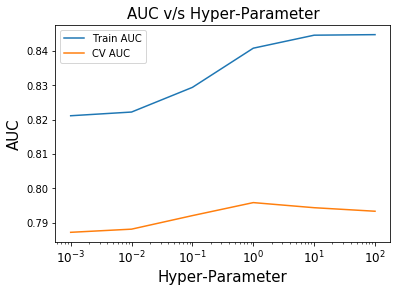

In [66]:
semiloggraph(train_auc,cv_auc,1)

In [67]:
param=lr_model.best_params_
print(f"best parameters:{param}")

best parameters:{'C': 1, 'max_iter': 10}


##### ROC Curve

In [68]:
best_para=param['C']

In [69]:
best_para

1

In [70]:
para=0

In [71]:
lr,tr_fpr,tr_tpr,te_fpr,te_tpr,tr_thresholds,y_trprob,y_teprob,y_trpred,y_tepred=\
parameters(X_tr,X_te,Y_train,Y_test,best_para,para,0) 

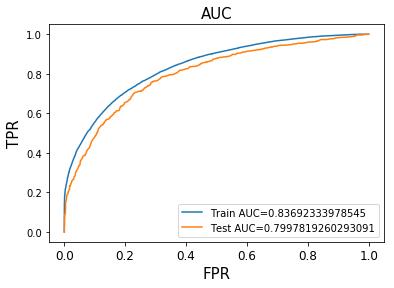

In [72]:
roc_plot(tr_fpr,tr_tpr,te_fpr,te_tpr)

##### Confusion Matrix

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix_tr=confusion_matrix(Y_train,y_trpred)
confusion_matrix_te=confusion_matrix(Y_test,y_tepred)
print("****Confusion matrix_Train****")
print(confusion_matrix_tr)

****Confusion matrix_Train****
[[2443  466]
 [ 749 1442]]


In [74]:
print("****Confusion matrix_Test****")
print(confusion_matrix_te)

****Confusion matrix_Test****
[[1169  264]
 [ 398  682]]


##### Classification Report

In [75]:
from sklearn.metrics import f1_score
mdl1_f1=f1_score(Y_test,y_tepred)
print(f"F1 Score:{mdl1_f1}")

F1 Score:0.6732477788746298


#### Model:XG Boost classifier +One hot Encoding of Categorical class data

##### Hyperparameter Tuning

In [76]:
train_auc,cv_auc,lr_model,scores=tuning(X_tr,Y_train,1)

In [77]:
semiloggraph(train_auc,cv_auc,0)

In [78]:
para=lr_model.best_params_

##### ROC Curve

In [79]:
para

{'max_depth': 8, 'n_estimators': 200}

In [80]:
best_para=0

In [81]:
lr,tr_fpr,tr_tpr,te_fpr,te_tpr,tr_thresholds,y_trprob,y_teprob,y_trpred,y_tepred=\
parameters(X_tr,X_te,Y_train,Y_test,best_para,para,1) 

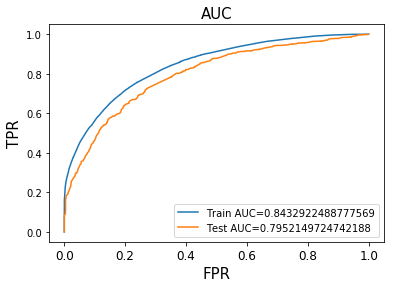

In [82]:
roc_plot(tr_fpr,tr_tpr,te_fpr,te_tpr)

##### Confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix_tr=confusion_matrix(Y_train,y_trpred)
confusion_matrix_te=confusion_matrix(Y_test,y_tepred)
print("****Confusion matrix_Train****")
print(confusion_matrix_tr)

****Confusion matrix_Train****
[[2465  444]
 [ 755 1436]]


In [84]:
print("****Confusion matrix_Test****")
print(confusion_matrix_te)

****Confusion matrix_Test****
[[1164  269]
 [ 411  669]]


##### Classification Report

In [85]:
mdl2_f1=f1_score(Y_test,y_tepred)
print(f"F1 Score:{mdl2_f1}")

F1 Score:0.6630327056491576


#### Feature Engineering

##### Adding Extra Features-Sentiment scores

In [86]:
"""Adding Sentiment scores of Keywords"""
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#reference-https://stackoverflow.com/questions/42212810/tqdm-in-jupyter-notebook
from tqdm.auto import tqdm
tqdm.pandas()

# import nltk
#nltk.download('vader_lexicon')
def sent_analyser(data,ftr):
    neg=[]
    neu=[]
    pos=[]
    com=[]
    data_f=pd.DataFrame()
    sid = SentimentIntensityAnalyzer()
    for tweet in tqdm(data[ftr].values):
        ss = sid.polarity_scores(tweet)
        temp=[]
        for k in ss:
            temp.append(ss[k])
        neg.append(temp[0])
        neu.append(temp[1])
        pos.append(temp[2])
        com.append(temp[3])
    data_f['neg']=neg
    data_f['pos']=pos
    data_f['neu']=neu    
    data_f['com']=com
    print(ss)
    return data_f

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93"""

In [87]:
X_train.head(3)

,keyword,text
6051,sinkhole,10news water main break disrupts trolley service
7593,fatalities,heard really loud bang everyone asleep great
970,body%20bag,new summer long thin body bag hip word skirt blue


In [88]:
X_train_sent=sent_analyser(X_train,'text')
X_test_sent=sent_analyser(X_test,'text')
X_test_sent.head(3)


{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.4215}



{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


,neg,pos,neu,com
0,0.260,0.163,0.577,-0.3274
1,0.000,0.000,1.000,0.0000
2,0.477,0.000,0.523,-0.8481


##### Stacking sparse matrices

In [89]:
from scipy.sparse import hstack
X_tr=hstack((train_text_tf,keyword_one_hot_X_train,X_train_sent)).tocsr()
X_te=hstack((test_text_tf,keyword_one_hot_X_test,X_test_sent)).tocsr()
print(f"Train data-:{X_tr.shape},Train data-Target:{Y_train.shape}")
print(f"Test data- X_data:{X_te.shape},Test data-Target:{Y_test.shape}")

Train data-:(5100, 443),Train data-Target:(5100,)
Test data- X_data:(2513, 443),Test data-Target:(2513,)


#### Model:Logistic Regression +One hot Encoding of Categorical class data+sentiment score

##### Hyperparameter Tuning

In [90]:
train_auc,cv_auc,lr_model=tuning(X_tr,Y_train,0)

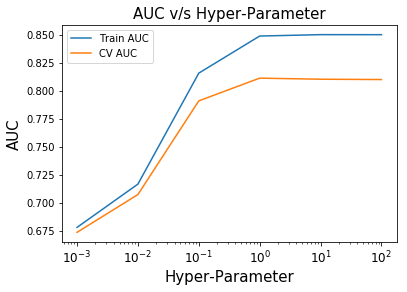

In [91]:
semiloggraph(train_auc,cv_auc,1)

##### ROC Curve

In [92]:
param=lr_model.best_params_
print(f"best parameters:{param}")

best parameters:{'C': 1, 'max_iter': 10}


In [93]:
best_para=param['C']

In [94]:
best_para

1

In [95]:
para=0

In [96]:
lr,tr_fpr,tr_tpr,te_fpr,te_tpr,tr_thresholds,y_trprob,y_teprob,y_trpred,y_tepred=\
parameters(X_tr,X_te,Y_train,Y_test,best_para,para,0) 

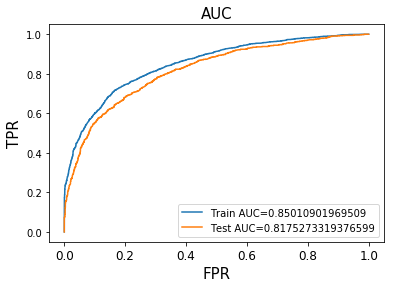

In [97]:
roc_plot(tr_fpr,tr_tpr,te_fpr,te_tpr)

##### Confusion Matrix

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix_tr=confusion_matrix(Y_train,y_trpred)
confusion_matrix_te=confusion_matrix(Y_test,y_tepred)
print("****Confusion matrix_Train****")
print(confusion_matrix_tr)

****Confusion matrix_Train****
[[2484  425]
 [ 688 1503]]


In [99]:
print("****Confusion matrix_Test****")
print(confusion_matrix_te)

****Confusion matrix_Test****
[[1169  264]
 [ 366  714]]


##### Classification Report

In [100]:
mdl3_f1=f1_score(Y_test,y_tepred)
print(f"F1 Score:{mdl3_f1}")

F1 Score:0.693877551020408


#### Model:KNN +One hot Encoding of Categorical class data+sentiment score

In [101]:
from sklearn.neighbors import KNeighborsClassifier
train_auc = []
cv_auc = []
k_range = [1,11,31,51,71,91]
param_grid = dict(n_neighbors = k_range)

neigh = KNeighborsClassifier()
neigh_model=GridSearchCV(neigh,param_grid,cv=5,scoring='roc_auc',return_train_score=True)
neigh_model.fit(X_tr,Y_train)

train_auc= neigh_model.cv_results_['mean_train_score']
cv_auc= neigh_model.cv_results_['mean_test_score']
nn=neigh_model.best_params_
nn_val=nn['n_neighbors']

In [102]:
neigh = KNeighborsClassifier(n_neighbors = nn_val)
neigh.fit(X_tr,Y_train)
y_trpred=neigh.predict(X_tr)
y_tepred=neigh.predict(X_te)

In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix_tr=confusion_matrix(Y_train,y_trpred)
confusion_matrix_te=confusion_matrix(Y_test,y_tepred)
print("****Confusion matrix_Train****")
print(confusion_matrix_tr)

****Confusion matrix_Train****
[[2474  435]
 [ 796 1395]]


In [104]:
print("****Confusion matrix_Test****")
print(confusion_matrix_te)

****Confusion matrix_Test****
[[1218  215]
 [ 420  660]]


In [105]:
mdl4_f1=f1_score(Y_test,y_tepred)
print(f"F1 Score:{mdl4_f1}")

F1 Score:0.6751918158567775


#### Model:SVM +One hot Encoding of Categorical class data+sentiment score

In [106]:
from sklearn.svm import LinearSVC
train_auc=[]
cv_auc=[]
para={'C':[0.0001,0.001,0.01,0.1,1,10,100],'max_iter':[10,20,30,40]}
svm=LinearSVC(loss='squared_hinge')
svm_model=GridSearchCV(svm,para,scoring='roc_auc')
svm_model.fit(X_tr,Y_train)
para=svm_model.best_params_
para_alpha=para['C']
para_iter=para['max_iter']

In [107]:
print(f"best parameters:{para}")

best parameters:{'C': 0.1, 'max_iter': 10}


In [108]:
svm = LinearSVC(C=para_alpha,max_iter=para_iter)
svm.fit(X_tr,Y_train)
y_trpred=svm.predict(X_tr)
y_tepred=svm.predict(X_te)

In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix_tr=confusion_matrix(Y_train,y_trpred)
confusion_matrix_te=confusion_matrix(Y_test,y_tepred)
print("****Confusion matrix_Train****")
print(confusion_matrix_tr)

****Confusion matrix_Train****
[[2492  417]
 [ 706 1485]]


In [110]:
print("****Confusion matrix_Test****")
print(confusion_matrix_te)

****Confusion matrix_Test****
[[1183  250]
 [ 381  699]]


In [111]:
mdl5_f1=f1_score(Y_test,y_tepred)
print(f"F1 Score:{mdl5_f1}")

F1 Score:0.6890093642188271


#### Comparing Results & Selecting Best Model

In [112]:
data = {'F1_SCORE':[mdl1_f1,mdl2_f1,mdl3_f1,mdl4_f1,mdl5_f1]}
labels= ['Logistic Regression', 'XGBoost Classification','Logistic Regression+Sentimet analysis','KNN+Sentimet analysis','SVM+Sentimet analysis']
F1_df=pd.DataFrame(data,index=labels)
F1_df

,F1_SCORE
Logistic Regression,0.673248
XGBoost Classification,0.663033
Logistic Regression+Sentimet analysis,0.693878
KNN+Sentimet analysis,0.675192
SVM+Sentimet analysis,0.689009


- Logistic Regression & SVM with  One-hot encoding and Sentiment analysis gives better F1 scores.
- SV is selected for test data classification

#### Classifying Kaggle-Test Data

##### Loading Original Test data - Kaggle

In [113]:
data_df_test=pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
data_df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [114]:
id_test=[]
id_test=data_df_test['id'].values

In [115]:
data_df_test.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

##### Null value Treatment

In [116]:
data_df_test.drop(['id','location'],axis=1,inplace=True)
data_df_test.head(3)

,keyword,text
0,NaN,Just happened a terrible car crash
1,NaN,"Heard about #earthquake is different cities, s..."
2,NaN,"there is a forest fire at spot pond, geese are..."


In [117]:
data_df_test.shape

(3263, 2)

In [118]:
data_df_test.isna().sum()

keyword    26
text        0
dtype: int64

In [119]:
data_df_test['keyword']=data_df_test['keyword'].fillna(data_df_test['keyword'].mode()[0])

In [120]:
data_df_test.shape

(3263, 2)

In [121]:
data_df_test.isna().sum()

keyword    0
text       0
dtype: int64

##### Normmalizing text data

In [122]:
data_df_test=text_normalizing(data_df_test,'text')

##### TF-idf vectorization

In [123]:
"""Encoding tweets-text"""
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2),min_df=10)
vectorizer.fit(X_train['text'].values) 
train_text_tf=vectorizer.transform(X_train['text'].values)
data_test_text_tf=vectorizer.transform(data_df_test['text'].values)

In [124]:
print(f"Test data-:{data_test_text_tf.shape}")

Test data-:(3263, 200)


##### One-Hot Encoding

In [125]:
"""Vectorizing Keyword -One hot encoding"""
keyword_one_hot_X_train,keyword_one_hot_data_df_test=\
wordvectorizer(X_train['keyword'],data_df_test['keyword'])
print("After vectorizations")
print(f"train data:{keyword_one_hot_X_train.shape,Y_train.shape}")
print(f"test data:{keyword_one_hot_data_df_test.shape}")

After vectorizations
train data:((5100, 239), (5100,))
test data:(3263, 239)


##### Sentiment Analyser

In [126]:
data_df_test_sent=sent_analyser(data_df_test,'text')


{'neg': 0.26, 'neu': 0.5, 'pos': 0.24, 'compound': -0.0516}


##### Stacking Sparse Matrices

In [127]:
from scipy.sparse import hstack
data_df_X_te=hstack((data_test_text_tf,keyword_one_hot_data_df_test,data_df_test_sent)).tocsr()
print(f"Train data- X_data:{X_tr.shape},Y_data:{Y_train.shape}")
print(f"Test data- X_data:{data_df_X_te.shape}")

Train data- X_data:(5100, 443),Y_data:(5100,)
Test data- X_data:(3263, 443)


##### Applying SVM for classification

In [128]:
svm = LinearSVC(C=0.1,max_iter=30)
svm.fit(X_tr,Y_train)
y_trpred=svm.predict(X_tr)
y_tepred=svm.predict(data_df_X_te)

In [129]:
result=pd.DataFrame()
result['id']=id_test
result['target']=y_tepred

In [130]:
print(result.shape)

(3263, 2)


In [131]:
result.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,1


In [132]:
#result.to_excel(r"E:\projects-ai resume\kaggle_tweet\tweet_disaster_results.xlsx")

#### BOW+ SVM-Tuning for better F1

##### BOW

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(binary=True)
vectorizer.fit(X_train['text'])
train_text_bow=vectorizer.transform(X_train['text'])
test_text_bow=vectorizer.transform(X_test['text'])

In [134]:
from scipy.sparse import hstack
X_tr=hstack((train_text_bow,keyword_one_hot_X_train,X_train_sent)).tocsr()
X_te=hstack((test_text_bow,keyword_one_hot_X_test,X_test_sent)).tocsr()
print(f"Train data-:{X_tr.shape},Train data-Target:{Y_train.shape}")
print(f"Test data- X_data:{X_te.shape},Test data-Target:{Y_test.shape}")

Train data-:(5100, 13027),Train data-Target:(5100,)
Test data- X_data:(2513, 13027),Test data-Target:(2513,)


In [135]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
train_auc=[]
cv_auc=[]
para={'C':[0.0001,0.001,0.01,0.1,1,10,100],'max_iter':[10,20,30,40]}
svm=LinearSVC(loss='squared_hinge')
svm_model=GridSearchCV(svm,para,scoring='roc_auc')
svm_model.fit(X_tr,Y_train)
para=svm_model.best_params_
para_alpha=para['C']
para_iter=para['max_iter']

In [136]:
print(f"best parameters:{para}")

best parameters:{'C': 0.01, 'max_iter': 20}


In [137]:
svm = LinearSVC(C=para_alpha,max_iter=para_iter)
svm.fit(X_tr,Y_train)
y_trpred=svm.predict(X_tr)
y_tepred=svm.predict(X_te)

In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix_tr=confusion_matrix(Y_train,y_trpred)
confusion_matrix_te=confusion_matrix(Y_test,y_tepred)
print("****Confusion matrix_Train****")
print(confusion_matrix_tr)

****Confusion matrix_Train****
[[2791  118]
 [ 518 1673]]


In [139]:
print("****Confusion matrix_Test****")
print(confusion_matrix_te)

****Confusion matrix_Test****
[[1291  142]
 [ 355  725]]


In [140]:
from sklearn.metrics import f1_score
mdl5_f1=f1_score(Y_test,y_tepred)
print(f"F1 Score:{mdl5_f1}")

F1 Score:0.7447354904982023


- BOW model is giving better score than tfidf  model

#### Applying SVM+BOW+Sentiment analysis on kaggle-Test Data

##### Loading Original Test data - Kaggle

In [141]:
data_df_test=pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
data_df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [142]:
id_test=[]
id_test=data_df_test['id'].values

In [143]:
data_df_test.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

##### Null value Treatment

In [144]:
data_df_test.drop(['id','location'],axis=1,inplace=True)
data_df_test.head(3)

,keyword,text
0,NaN,Just happened a terrible car crash
1,NaN,"Heard about #earthquake is different cities, s..."
2,NaN,"there is a forest fire at spot pond, geese are..."


In [145]:
data_df_test.shape

(3263, 2)

In [146]:
data_df_test.isna().sum()

keyword    26
text        0
dtype: int64

In [147]:
data_df_test['keyword']=data_df_test['keyword'].fillna(data_df_test['keyword'].mode()[0])

In [148]:
data_df_test.shape

(3263, 2)

In [149]:
data_df_test.isna().sum()

keyword    0
text       0
dtype: int64

##### Normmalizing text data

In [150]:
data_df_test=text_normalizing(data_df_test,'text')

##### BOW vectorization

In [151]:
"""Encoding tweets-text"""
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['text'].values) 
train_text_bow=vectorizer.transform(X_train['text'].values)
data_test_text_bow=vectorizer.transform(data_df_test['text'].values)

In [152]:
print(f"Test data-:{data_test_text_tf.shape}")

Test data-:(3263, 200)


##### One-Hot Encoding

In [153]:
"""Vectorizing Keyword -One hot encoding"""
keyword_one_hot_X_train,keyword_one_hot_data_df_test=\
wordvectorizer(X_train['keyword'],data_df_test['keyword'])
print("After vectorizations")
print(f"train data:{keyword_one_hot_X_train.shape,Y_train.shape}")
print(f"test data:{keyword_one_hot_data_df_test.shape}")

After vectorizations
train data:((5100, 239), (5100,))
test data:(3263, 239)


##### Sentiment Analyser

In [154]:
data_df_test_sent=sent_analyser(data_df_test,'text')


{'neg': 0.26, 'neu': 0.5, 'pos': 0.24, 'compound': -0.0516}


##### Stacking Sparse Matrices

In [155]:
from scipy.sparse import hstack
data_df_X_te=hstack((data_test_text_bow,keyword_one_hot_data_df_test,data_df_test_sent)).tocsr()
print(f"Train data- X_data:{X_tr.shape},Y_data:{Y_train.shape}")
print(f"Test data- X_data:{data_df_X_te.shape}")

Train data- X_data:(5100, 13027),Y_data:(5100,)
Test data- X_data:(3263, 13027)


##### Applying SVM for classification

In [156]:
svm = LinearSVC(C=0.01,max_iter=20)
svm.fit(X_tr,Y_train)
y_trpred=svm.predict(X_tr)
y_tepred=svm.predict(data_df_X_te)

In [157]:
result=pd.DataFrame()
result['id']=id_test
result['target']=y_tepred

In [158]:
print(result.shape)

(3263, 2)


In [159]:
result.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


In [162]:
result.to_csv('tweet_disaster_subbmission.csv',index=False)